# Loading Data

In [3]:
data <- read.csv("D:/Research 2014-2015/Data Quality/keyword/Keyword/data.csv")

## The database is attached to the R search path. so objects in the database can be accessed by simply giving their names.
## attach(data,warn.conflicts = FALSE)

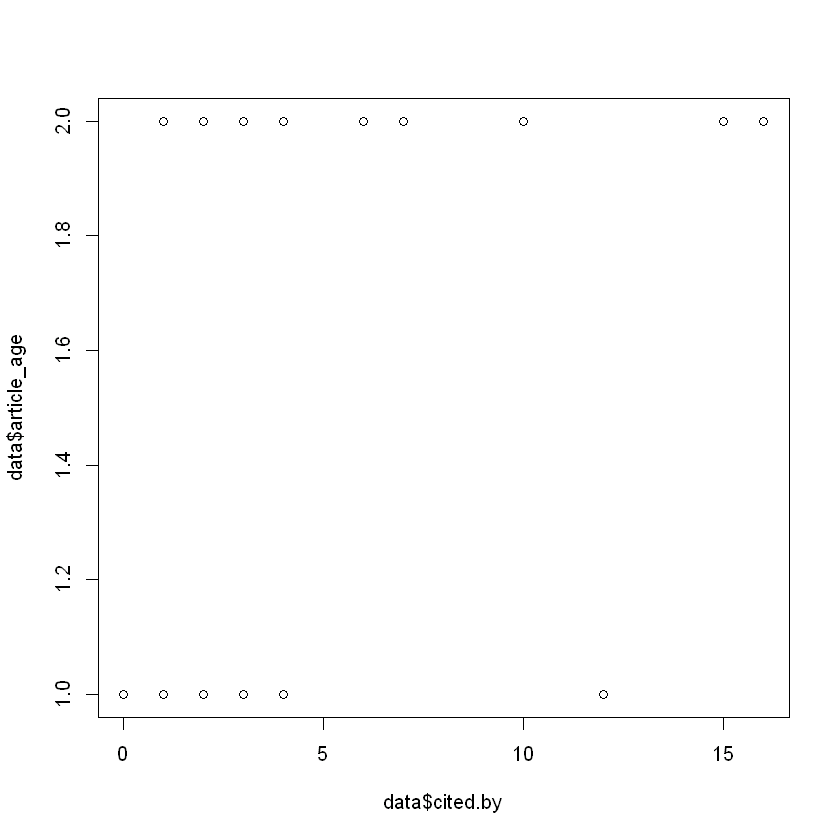

In [10]:
plot(data$article_age, data$cited.by , )

# Data Cleaning

In [4]:
## subsetting papers with document.type=="article"
data <- data[document.type=="article",]

dim(data)

ERROR: Error in `[.data.frame`(data, document.type == "article", ): object 'document.type' not found


[1] 350  61

In [5]:
## random sampling
set.seed(1)
random_index <- sample(1:nrow(data), size = 50, replace = FALSE, prob = NULL)
print(random_index)
data <- data[random_index,]
#unique(data$review)
#names(data)

 [1]  93 130 200 316  70 310 325 227 216  22  71  60 233 349 259 167 240 331 127
[20] 258 309 346 214  42  88 126   5 124 281 110 155 192 157 339 262 211 250  34
[39] 226 128 255 348 242 170 163 241   8 145 222 209


# Creating Predictors and Target

In [14]:
## "abstract_sum","title_sum",
##  "article_squaredage" 
## "review"

predictors <- c("no_authors","article_age","page.count","no_references",
                "abstract_length","title_length",
                "abstract_ratio"
               )

## title_length
## no of keywords
names(data)

target <- c("cited.by")

data <- data[,c(predictors,target)]
data <- na.omit(data)

str(data)


[1] "X"                             "ï..authors"                   
 [3] "title"                         "year"                         
 [5] "source.title"                  "volume"                       
 [7] "issue"                         "art..no."                     
 [9] "page.start"                    "page.end"                     
[11] "page.count"                    "cited.by"                     
[13] "link"                          "affiliations"                 
[15] "authors.with.affiliations"     "abstract"                     
[17] "author.keywords"               "index.keywords"               
[19] "references"                    "publisher"                    
[21] "issn"                          "isbn"                         
[23] "coden"                         "language.of.original.document"
[25] "document.type"                 "source"                       
[27] "numkeys"                       "k01"                          
[29] "k01_abstract"                  "k01_title"                    
[31] "k02"                           "k02_abstract"                 
[33] "k02_title"                     "k03"                          
[35] "k03_abstract"                  "k03_title"                    
[37] "k04"                           "k04_abstract"                 
[39] "k04_title"                     "k05"                          
[41] "k05_abstract"                  "k05_title"                    
[43] "k06"                           "k06_abstract"                 
[45] "k06_title"                     "k07"                          
[47] "k07_abstract"                  "k07_title"                    
[49] "abstract_sum"                  "title_sum"                    
[51] "abstract_title_sum"            "no_authors"                   
[53] "article_age"                   "article_squaredage"           
[55] "abstract_length"               "title_length"                 
[57] "no_pages"                      "no_references"                
[59] "review"                        "title_ratio"                  
[61] "abstract_ratio"

'data.frame':	50 obs. of  8 variables:
 $ no_authors     : int  5 4 1 4 3 8 3 3 1 1 ...
 $ article_age    : int  1 1 1 2 1 2 2 1 1 1 ...
 $ page.count     : int  12 14 12 10 15 15 12 9 10 16 ...
 $ no_references  : int  80 85 63 58 60 66 83 58 43 26 ...
 $ abstract_length: int  253 213 154 252 279 223 173 118 146 203 ...
 $ title_length   : int  9 11 11 18 10 15 7 23 9 22 ...
 $ abstract_ratio : num  0 0 0.013 0 0.043 ...
 $ cited.by       : int  0 2 2 16 0 7 2 1 0 0 ...


# Data Cleaning

In [125]:
data <- data[which(!(row.names(data) %in% c(250,339,310,255,71,216,309,110,262,145,192,155,346,167,227))),]

# Linear Regression

ERROR: Error in hist(cited.by, article_age, data = data): object 'cited.by' not found


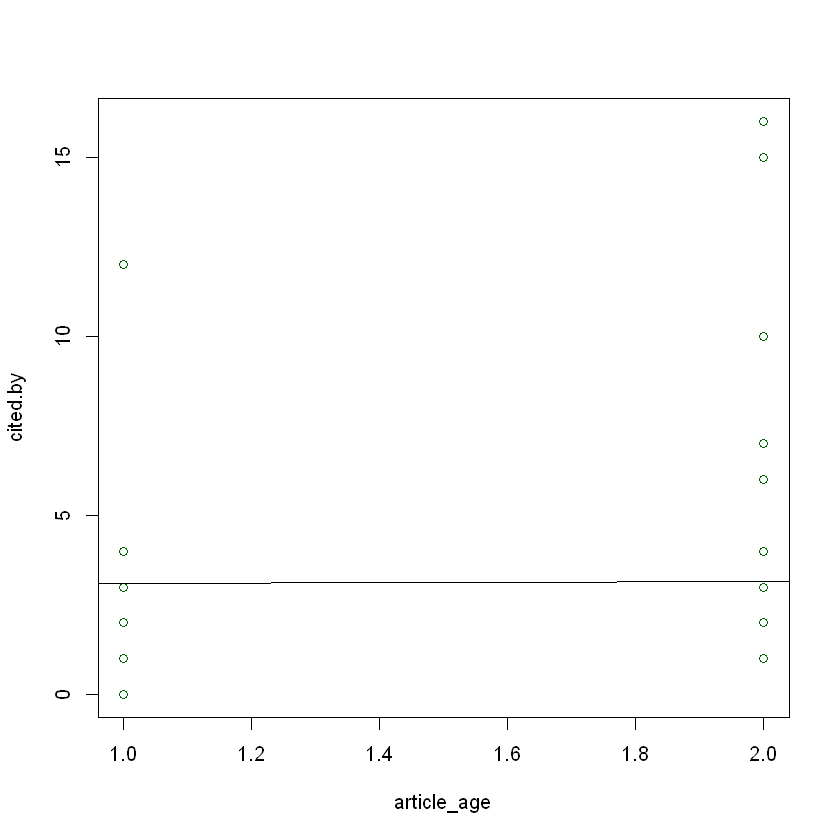

In [8]:
uni_linear_reg<- lm(cited.by ~ abstract_ratio , data=data)
plot(cited.by ~ article_age , data=data,col ="darkgreen")
abline(uni_linear_reg)
hist(datacited.by , article_age)

# Heatmap

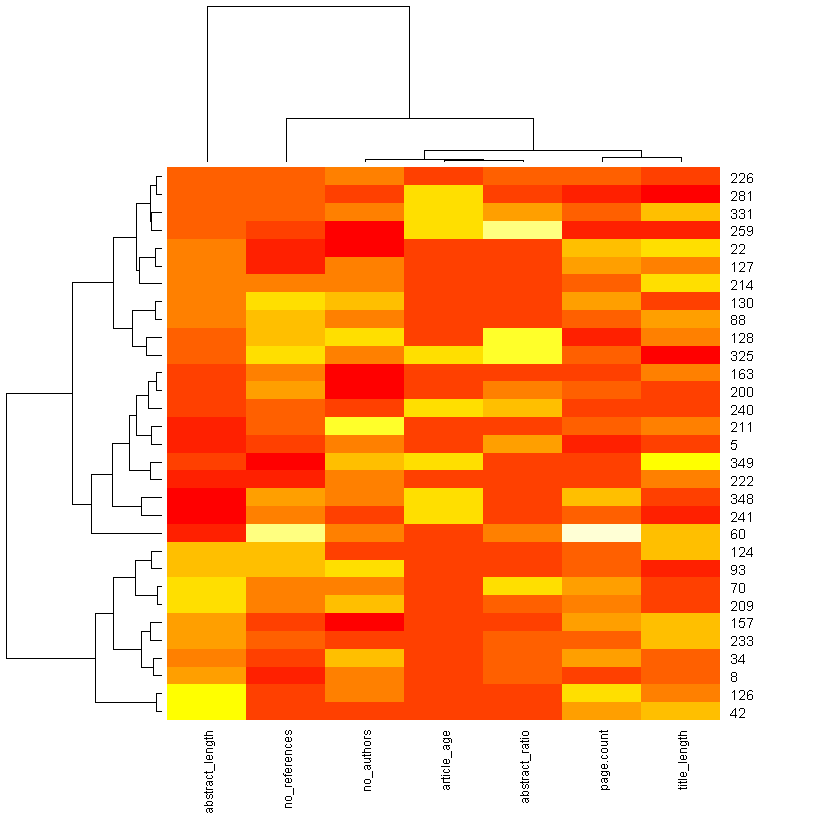

In [132]:
#par(cex.lab=25)
windows.options(width=1000, height=2000)
heatmap(as.matrix(data[,c(predictors)]), Colv=F, scale='column',cexCol = 0.75, margins = c(6,6) )


# Correlation Matrix

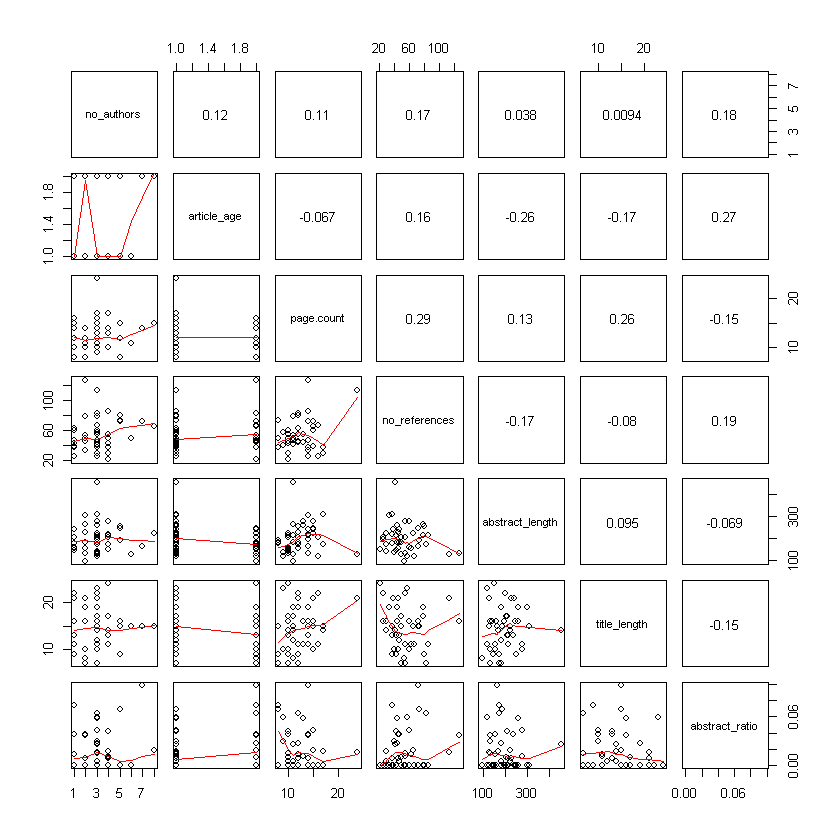

In [61]:
## put (absolute) correlations on the upper panels,
## with size proportional to the correlations.
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    # r <- abs(cor(x, y))

    r <- cor(x, y)
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    
    # removing the propotional property    
    # text(0.5, 0.5, txt, cex = cex.cor * r)
    text(0.5, 0.5, txt)
   
}
    
pairs(data[,predictors],lower.panel = panel.smooth, upper.panel = panel.cor)

# Building Preliminary Linear Regression Model

In [43]:
linear_reg <- lm(cited.by ~ . , data=data)

print('Preliminary Regression model')
summary(linear_reg)


[1] "Preliminary Regression model"



Call:
lm(formula = cited.by ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2250 -1.1946 -0.2587  0.7388  4.3293 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.662602   1.712187  -0.971   0.3377    
no_authors       0.170574   0.168509   1.012   0.3178    
article_age      2.549685   0.586539   4.347 9.96e-05 ***
page.count       0.155291   0.094051   1.651   0.1070    
no_references   -0.013217   0.013343  -0.991   0.3282    
abstract_length  0.001788   0.004159   0.430   0.6697    
title_length    -0.125223   0.058053  -2.157   0.0374 *  
abstract_ratio  -0.420950  11.141229  -0.038   0.9701    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.731 on 38 degrees of freedom
Multiple R-squared:  0.4751,	Adjusted R-squared:  0.3784 
F-statistic: 4.914 on 7 and 38 DF,  p-value: 0.0005059


# Preliminary QQ Plot

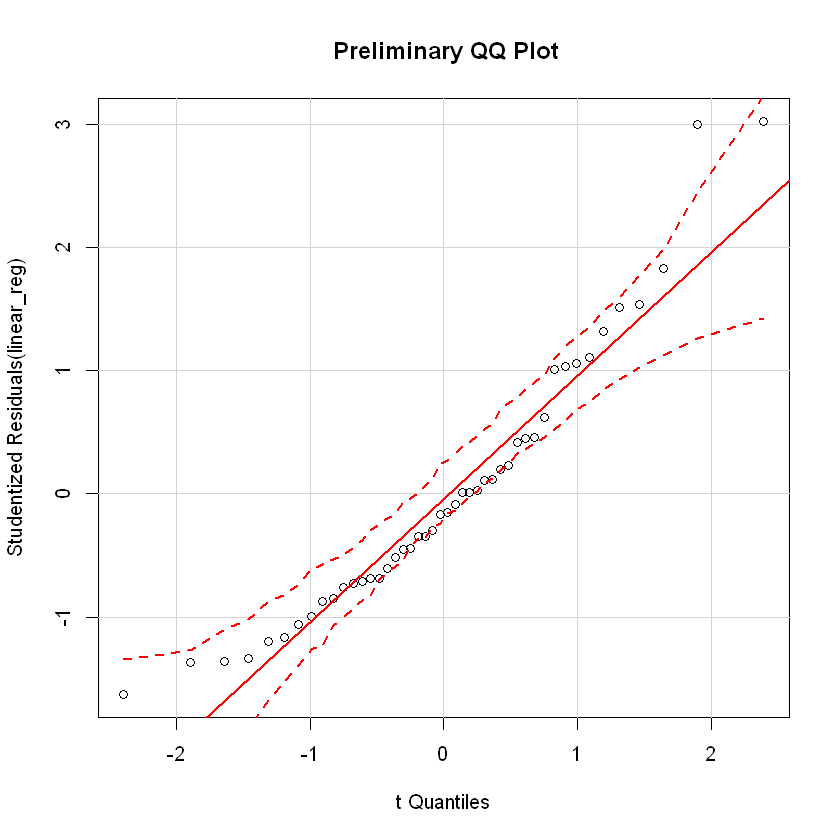

In [45]:
qqPlot(linear_reg, main=" Preliminary QQ Plot") #qq plot for studentized resid 
#leveragePlots(linear_reg) # leverage plots

# Regression Model 2

In [133]:
print ('Regression Model 2')
linear_reg <- lm(cited.by ~ . , data=data)
summary(linear_reg)
#which (!(row.names(data) %in% c(249,170)))

#(row.names(data) %in% c(249,170))
dim(data)



[1] "Regression Model 2"



Call:
lm(formula = cited.by ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10944 -0.40777 -0.05783  0.29566  1.43089 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.518089   1.215633   3.717  0.00113 ** 
no_authors       -0.356832   0.107719  -3.313  0.00304 ** 
article_age       1.086217   0.362229   2.999  0.00641 ** 
page.count       -0.033449   0.047391  -0.706  0.48739    
no_references     0.002001   0.007060   0.283  0.77935    
abstract_length  -0.004482   0.002666  -1.681  0.10624    
title_length     -0.148381   0.030460  -4.871 6.42e-05 ***
abstract_ratio  -17.914451   6.666948  -2.687  0.01316 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6996 on 23 degrees of freedom
Multiple R-squared:  0.7766,	Adjusted R-squared:  0.7086 
F-statistic: 11.42 on 7 and 23 DF,  p-value: 3.534e-06


[1] 31  8

# Regression Model 3

In [136]:
## After removing non-significant variables
predictors3 <- c("no_authors","article_age",
                "title_length",
                "abstract_ratio"
               )

## title_length
## no of keywords
names(data)

target3 <- c("cited.by")

data3 <- data[,c(predictors3,target3)]
data3 <- na.omit(data3)

print ('Regression Model 3')
linear_reg <- lm(cited.by ~ . , data=data3)
summary(linear_reg)


[1] "no_authors"      "article_age"     "page.count"      "no_references"  
[5] "abstract_length" "title_length"    "abstract_ratio"  "cited.by"

[1] "Regression Model 3"



Call:
lm(formula = cited.by ~ ., data = data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30936 -0.30539  0.03959  0.23989  1.58569 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.00034    0.80132   3.744 0.000908 ***
no_authors      -0.33417    0.10727  -3.115 0.004443 ** 
article_age      1.37645    0.32427   4.245 0.000246 ***
title_length    -0.15518    0.02919  -5.316 1.46e-05 ***
abstract_ratio -17.71286    6.54645  -2.706 0.011871 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7102 on 26 degrees of freedom
Multiple R-squared:  0.7397,	Adjusted R-squared:  0.6997 
F-statistic: 18.47 on 4 and 26 DF,  p-value: 2.674e-07


# QQplot 2

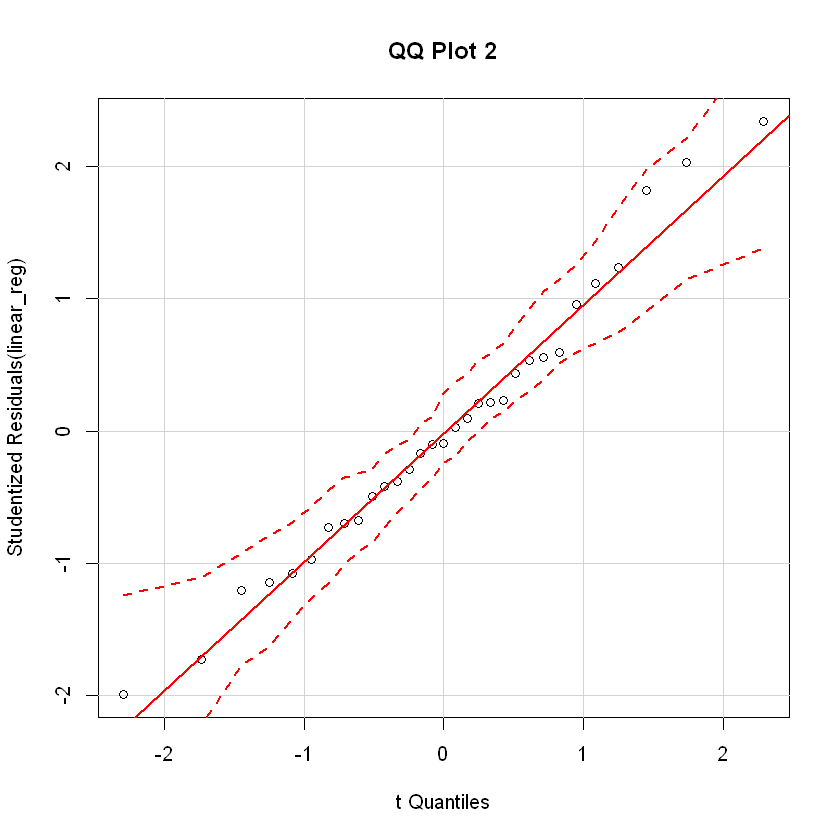

In [127]:
qqPlot(linear_reg, main="QQ Plot 2") #qq plot for studentized resid 

# Influence Index Plot

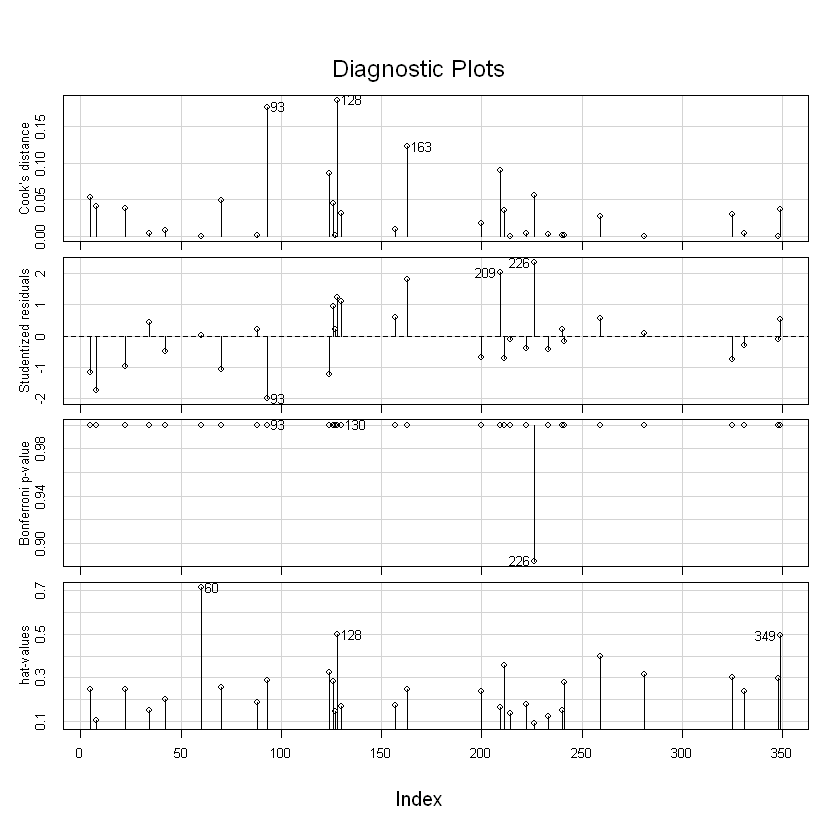

In [128]:
influenceIndexPlot(linear_reg, id.n=3)


In [137]:
## examining influential points

#data[which ((row.names(data) %in% c(257,35,145,310))),]
#data <- data[which (!(row.names(data) %in% c(257,35,145,310))),]

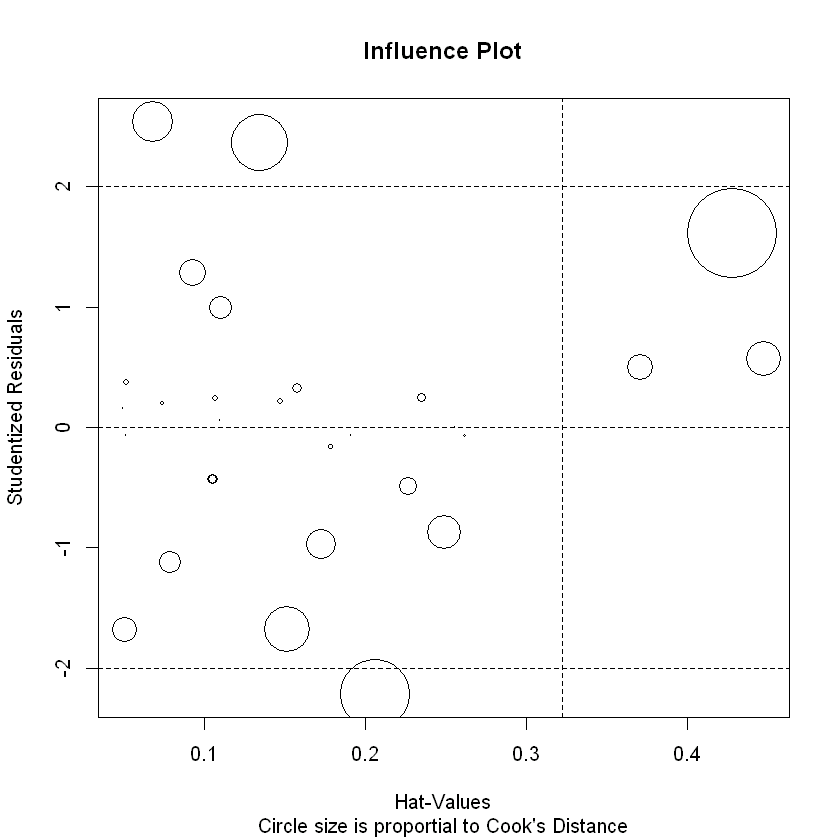

In [139]:
# Influence Plot 
influencePlot(linear_reg,	id.method="identify", main="Influence Plot", 
              sub="Circle size is proportial to Cook's Distance",id.n=3 )

# Multi-Collinearity

In [138]:
# Evaluate Collinearity
vif(linear_reg) # variance inflation factors 
# ??vif
sqrt(vif(linear_reg)) > 2 # problem?

no_authors    article_age   title_length abstract_ratio 
      1.053758       1.237214       1.246120       1.227245

no_authors    article_age   title_length abstract_ratio 
         FALSE          FALSE          FALSE          FALSE

# Normality of Residuals

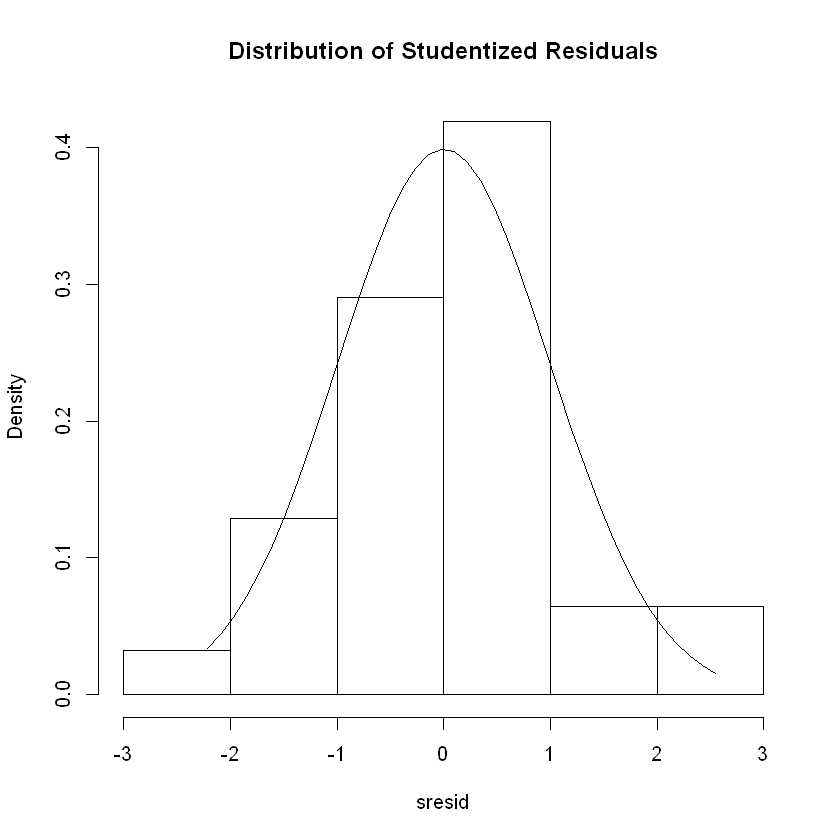

In [140]:
# qq plot for studentized resid
# qqPlot(linear_reg, main="QQ Plot")
# distribution of studentized residuals

library(MASS)
sresid <- studres(linear_reg) 
hist(sresid, freq=FALSE, 
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40) 
yfit<-dnorm(xfit) 
lines(xfit, yfit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2198788    Df = 1     p = 0.6391323 

Warning message:
In spreadLevelPlot.lm(linear_reg): 3 negative fitted values removed


Suggested power transformation:  0.9249757 

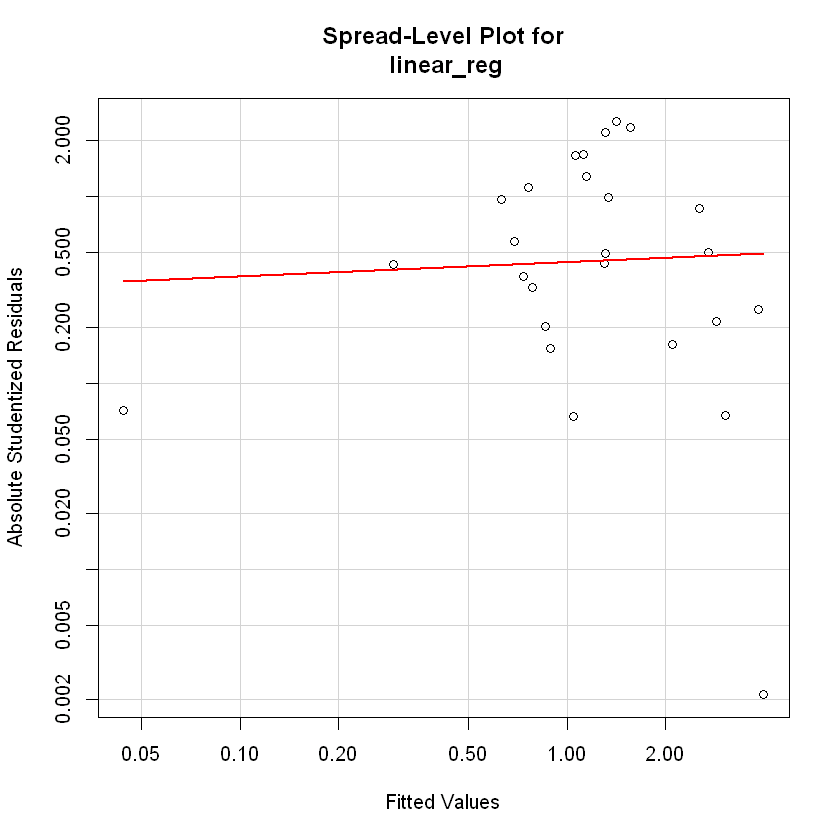

In [141]:
# Non-constant Error Variance

# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(linear_reg)

# plot studentized residuals vs. fitted values 
spreadLevelPlot(linear_reg)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


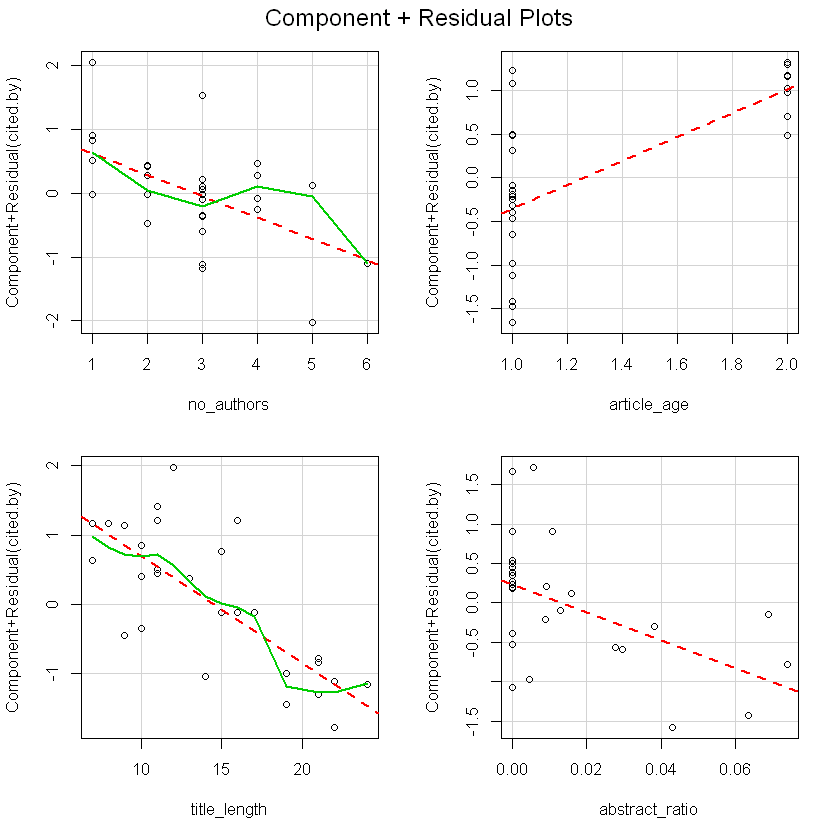

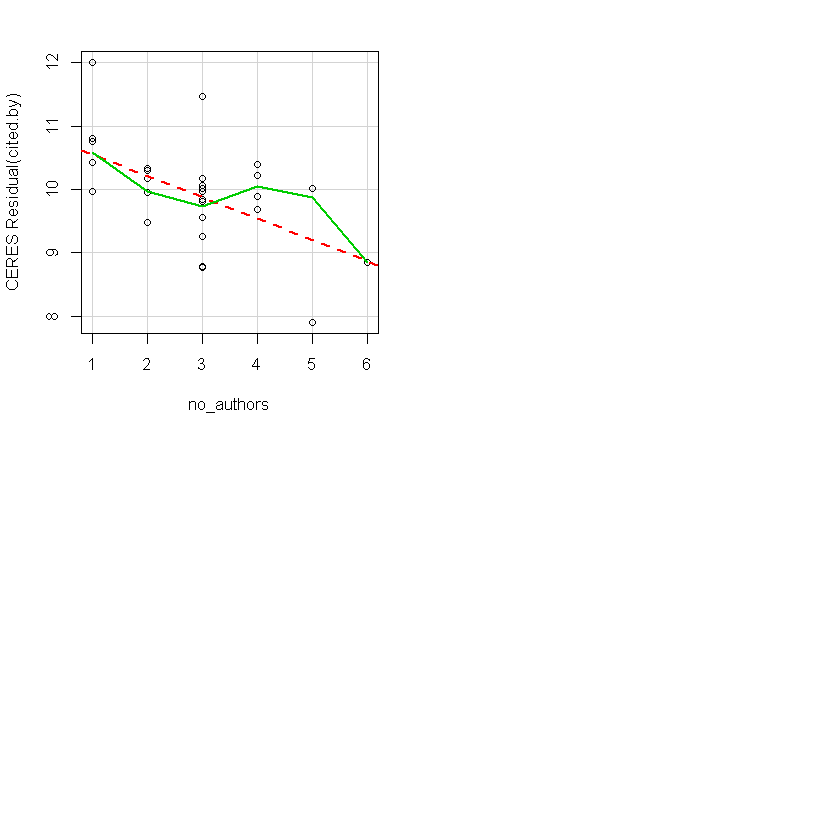

In [142]:
options(warn=-1)

# Evaluate Nonlinearity
# component + residual plot 
crPlots(linear_reg)
# Ceres plots 
ceresPlots(linear_reg)

# The Book Code

# Pearson Residuals

,Test stat,Pr(>|t|)
no_authors,0.371,0.714
article_age,-2.252,0.033
title_length,-1.272,0.215
abstract_ratio,0.772,0.448
Tukey test,0.739,0.460


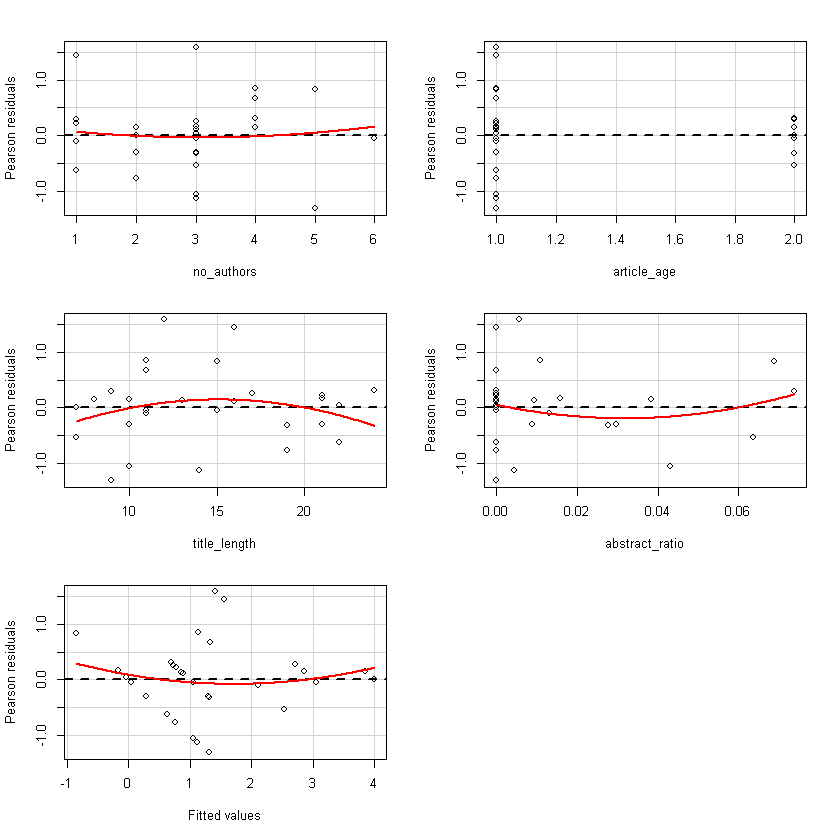

In [143]:
## Pearson residuals versus each of the predictors and versus the fitted values
## page 288
residualPlots(linear_reg)

# Studentized Residuals

,Test stat,Pr(>|t|)
no_authors,0.371,0.714
article_age,-2.252,0.033
title_length,-1.272,0.215
abstract_ratio,0.772,0.448
Tukey test,0.739,0.460


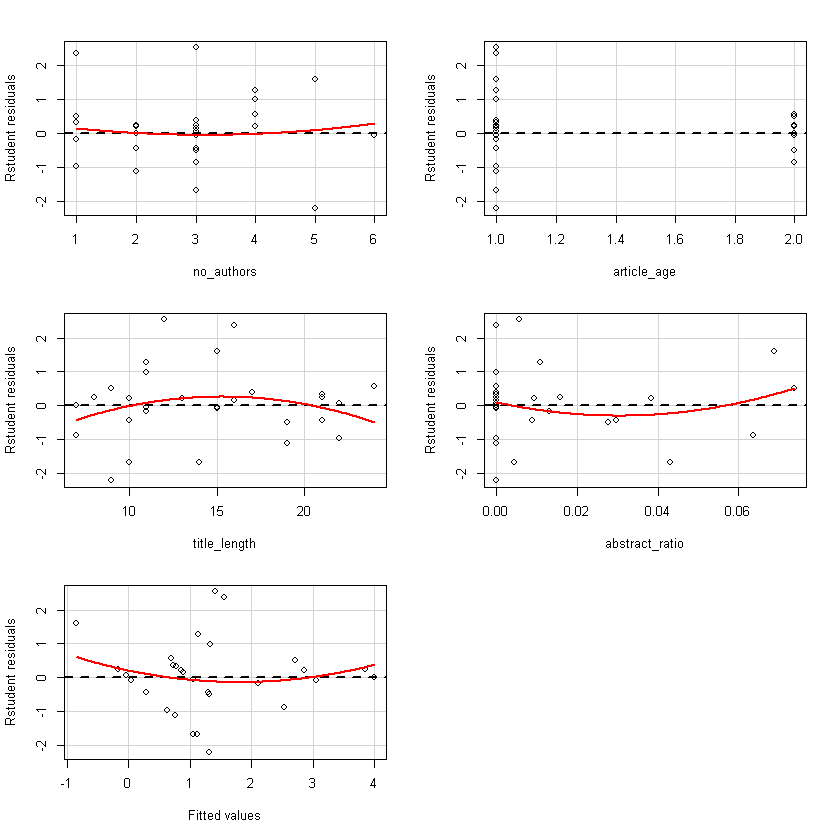

In [144]:
## Studentized residuals versus each of the predictors and versus the fitted values
## page 288
residualPlots(linear_reg, type="rstudent")

# MARGINAL MODEL PLOTS

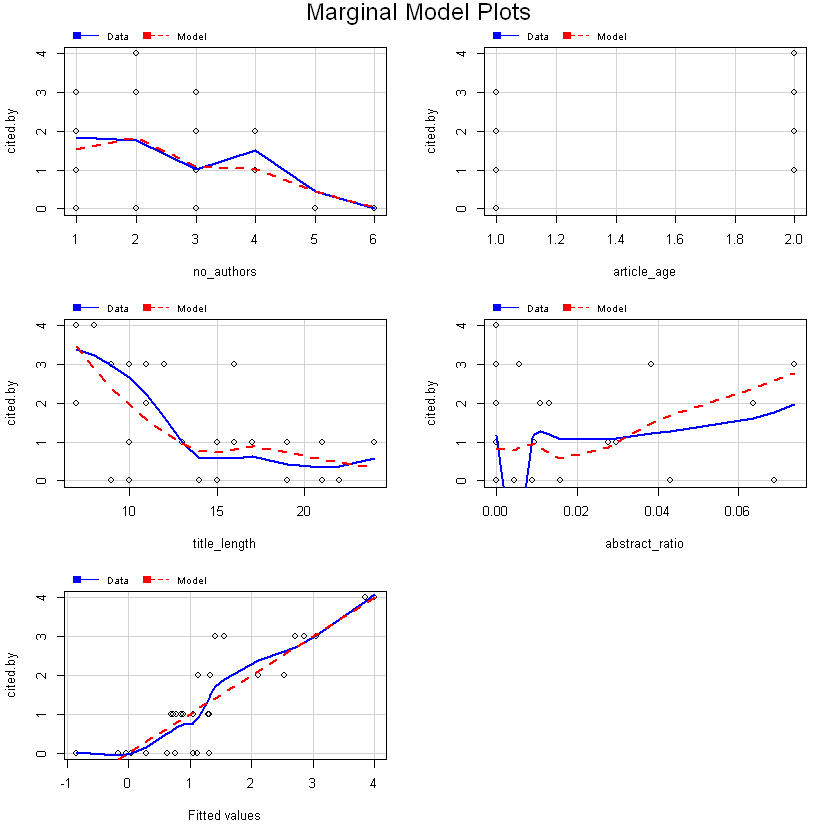

In [145]:
## A variation on the basic residual plot is themarginal model plot, proposed by Cook and Weisberg (1997)
marginalModelPlots(linear_reg)
## SD argument, if set to TRUE adds estimated standard deviation lines to the graph.


# Influence Index Plot

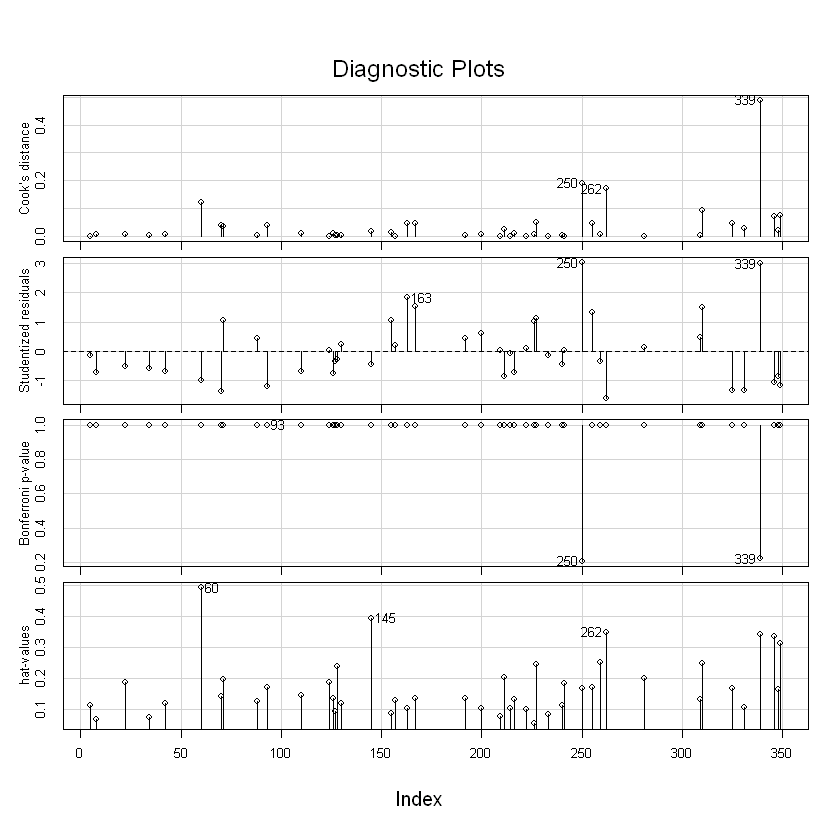

In [54]:
influenceIndexPlot(linear_reg, id.n=3)

# ADDED-VARIABLE PLOTS AS INFLUENCE DIAGNOSTICS

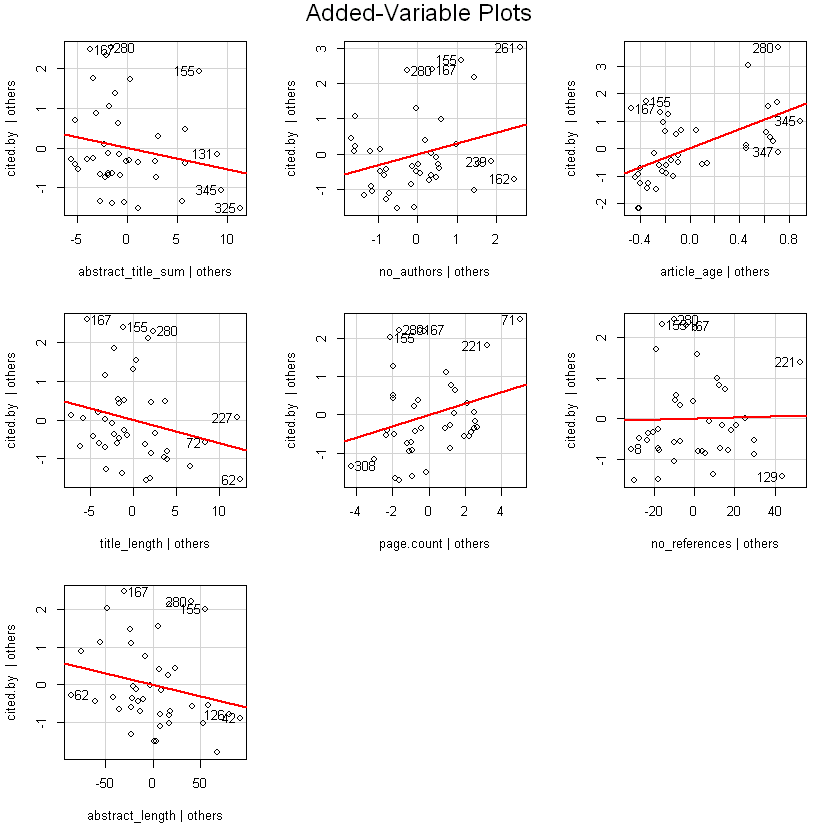

In [45]:
avPlots(linear_reg, id.n=3)

In [146]:
save.image()